In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
df=pd.read_csv("stack_survey_data.csv")
df['RemoteWork']=df['RemoteWork'].replace("Hybride(some in remote, some in-person)","Hybrid")
#print(df.head())

In [20]:
#detailing with duplicates
print(f"Size before removing duplicates:{df.shape}")
no_of_duplicate=df.duplicated().sum()
print(f"Number of duplicates: {no_of_duplicate}")
df.drop_duplicates(inplace=True)
print(f"Size after removing duplicates:{df.shape}")
print(df.duplicated().sum())


Size before removing duplicates:(65457, 114)
Number of duplicates: 20
Size after removing duplicates:(65437, 114)
0


In [52]:
#null columns
null_columns=df.columns[df.isnull().any()]
print(df['RemoteWork'].isnull().sum())
print(df['RemoteWork'].value_counts(dropna=False))
most_frequent=df['RemoteWork'].value_counts().idxmax()
df['RemoteWork'].fillna(most_frequent,inplace=True)
print(df['RemoteWork'].isnull().sum())
df['RemoteWork']=df['RemoteWork'].replace('Hybrid(some remote,some in-person','Hybrid')

0
RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64
0


/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_98195/3557809883.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent,inplace=True)


In [31]:
#Coding Activity column
print(df['CodingActivities'].isnull().sum())
coding_frequent=df['CodingActivities'].value_counts().idxmax()
df['CodingActivities'].fillna(coding_frequent,inplace=True)
print(df['CodingActivities'].isnull().sum())

10971
0


/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_98195/3253933979.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(coding_frequent,inplace=True)


In [44]:
df['YearsCodePro']=pd.to_numeric(df['YearsCodePro'],errors='coerce')
bins=[0,5,10,20,float('inf')]
labels=['0-5 years','5-10 years','10-20 years','>20 years']
df['Experience Range']=pd.cut(df['YearsCodePro'],bins=bins,labels=labels,right=False)
print(df['Experience Range'].head())
print(df['JobSat'].tail())
median_job_satisfaction = df.groupby('Experience Range')['JobSat'].median()
print(median_job_satisfaction)


Experience Range
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
>20 years      8.0
Name: JobSat, dtype: float64


/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_98195/3158537520.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_satisfaction = df.groupby('Experience Range')['JobSat'].median()


/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_33258/1207103143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat',data=df,palette='rocket')


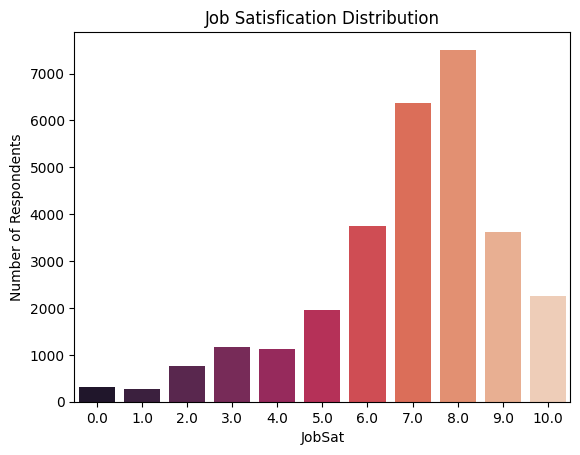

/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_33258/1207103143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork',data=df,palette='rocket_r')


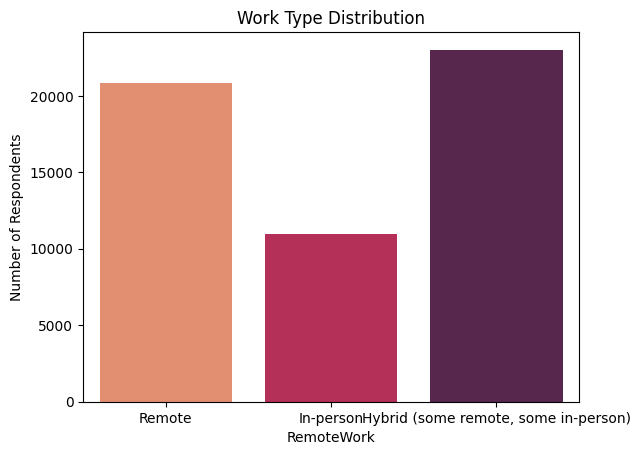

In [33]:
#JobSat plot
sns.countplot(x='JobSat',data=df,palette='rocket')
plt.title("Job Satisfication Distribution")
plt.ylabel("Number of Respondents")
plt.show()
#Remote work people
sns.countplot(x='RemoteWork',data=df,palette='rocket_r')
plt.title("Work Type Distribution")
plt.ylabel("Number of Respondents")
plt.show()




In [55]:
df_expanded = df.dropna(subset=['LanguageHaveWorkedWith']).copy()
df_expanded['LanguageHaveWorkedWith'] = df_expanded['LanguageHaveWorkedWith'].str.split(';')
df_expanded = df_expanded.explode('LanguageHaveWorkedWith')
language_by_region = df_expanded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')
top_languages=df_expanded['LanguageHaveWorkedWith'].value_counts().head()
language_by_region_top = language_by_region[language_by_region['LanguageHaveWorkedWith'].isin(top_languages)]




/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_33258/3270608899.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette='viridis')


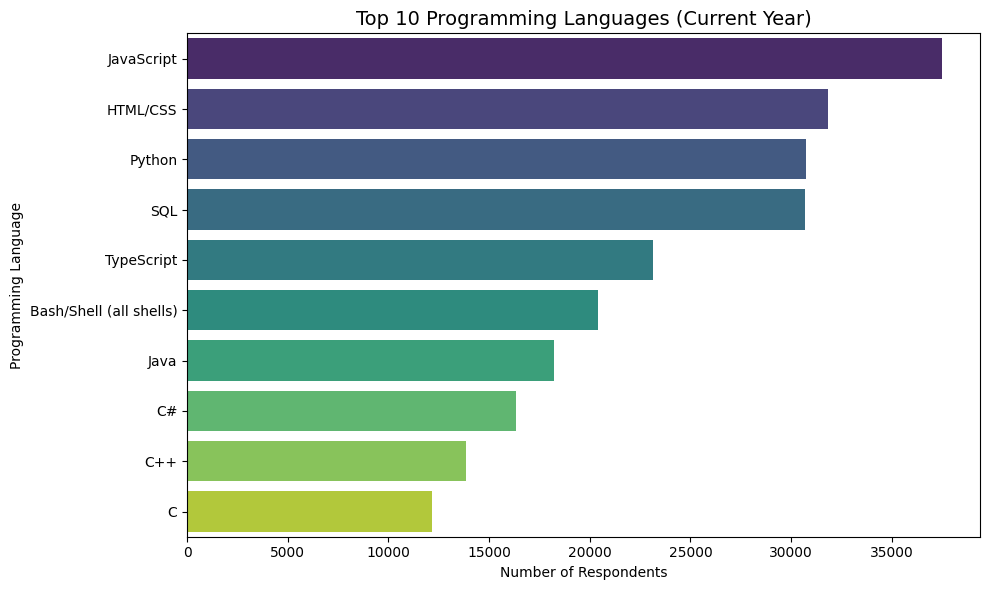

In [7]:
#Bar plot of top programming languages in current year
language_series = df['LanguageHaveWorkedWith'].dropna().str.split(';')
all_languages = pd.Series([lang.strip() for sublist in language_series for lang in sublist])

top_languages = all_languages.value_counts().head(10)
#print(top_languages)
plt.figure(figsize=(10,6))
sns.barplot(x=top_languages.values, y=top_languages.index, palette='viridis')
plt.title('Top 10 Programming Languages (Current Year)', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.savefig("ProgrammingCurrentTrend.png")
plt.show()





/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_33258/3485043814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dbs.values, y=top_10_dbs.index, palette='crest')


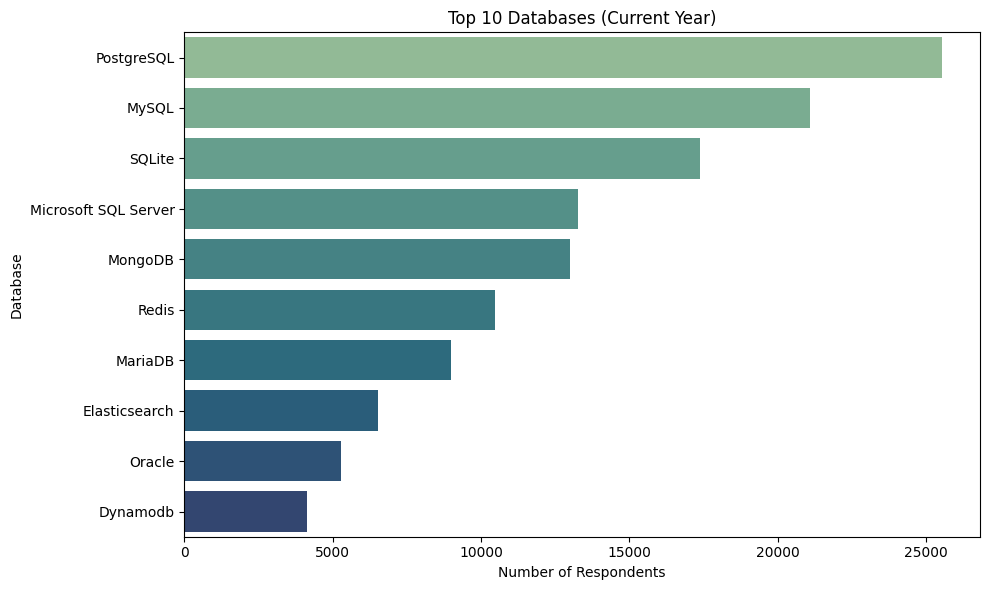

In [10]:
all_databases = df['DatabaseHaveWorkedWith'].dropna().str.split(';')
flat_list = [db.strip() for sublist in all_databases for db in sublist]
db_series = pd.Series(flat_list)
top_10_dbs = db_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_dbs.values, y=top_10_dbs.index, palette='crest')
plt.title("Top 10 Databases (Current Year)")
plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.tight_layout()
plt.savefig("DatabaseCurrentTrend.png")
plt.show()





/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_33258/1583308321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_future_dbs.values, y=top_10_future_dbs.index, palette='flare')


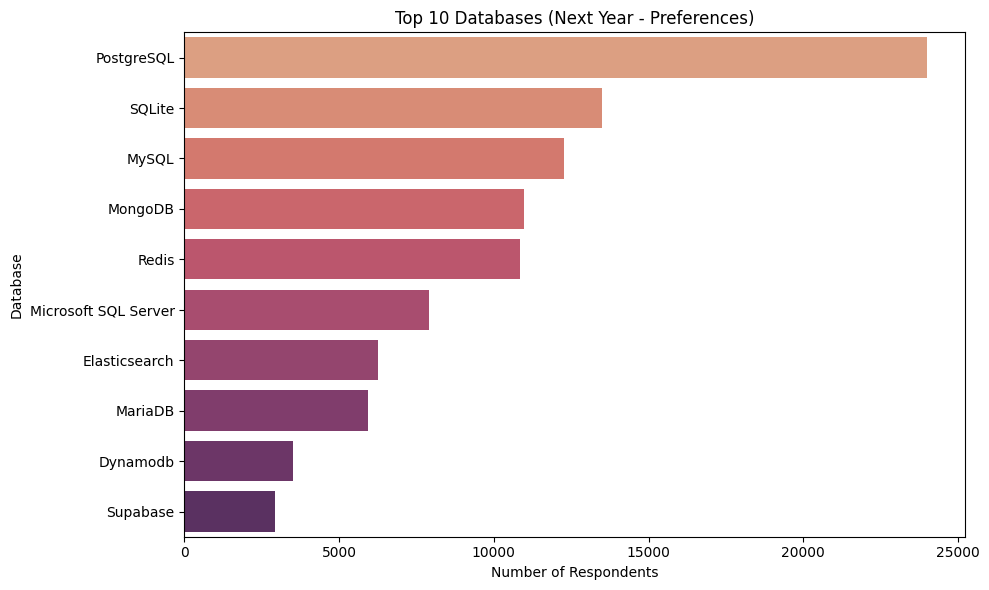

In [11]:
db_future = df['DatabaseWantToWorkWith'].dropna().str.split(';')
flat_list_future = [db.strip() for sublist in db_future for db in sublist]
future_db_series = pd.Series(flat_list_future)
top_10_future_dbs = future_db_series.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_future_dbs.values, y=top_10_future_dbs.index, palette='flare')
plt.title("Top 10 Databases (Next Year - Preferences)")
plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.tight_layout()
plt.savefig("DatabaseNextTrend.png")
plt.show()





<Axes: xlabel='RemoteWork'>

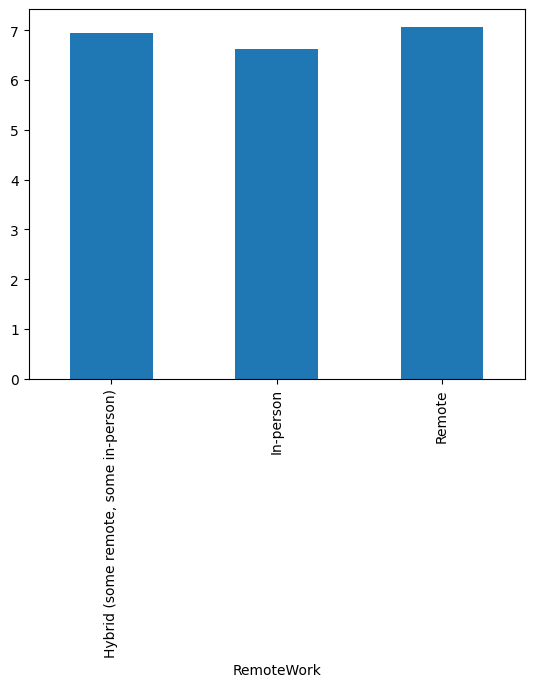

In [11]:
df.groupby('RemoteWork')['JobSat'].mean().plot(kind='bar')



/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_33258/3281784356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='RemoteWork', y='JobSat', palette='coolwarm')


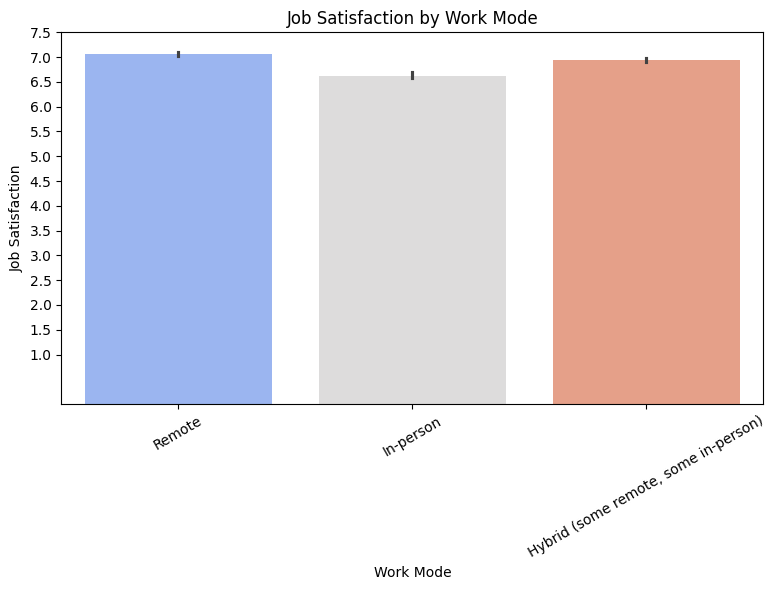

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='RemoteWork', y='JobSat', palette='coolwarm')
plt.title('Job Satisfaction by Work Mode')
plt.xlabel('Work Mode')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=30)
plt.yticks(np.arange(1,8,0.5))
plt.tight_layout()
plt.savefig("JobSat_vs_WorkMode.png")
plt.show()

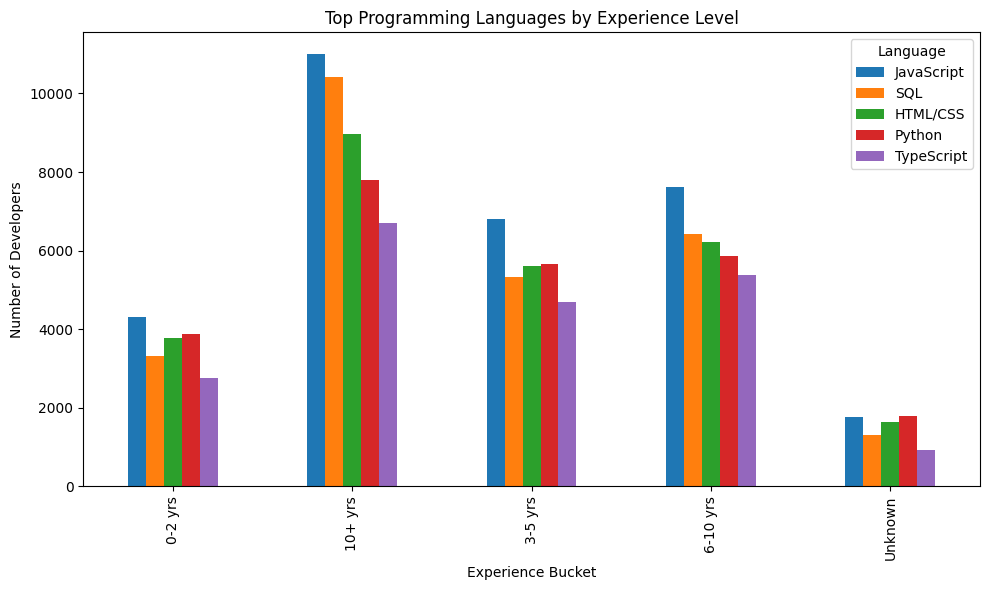

In [42]:
from collections import Counter

# Expand multi-select language column
df_exp = df[['YearsCodePro', 'LanguageHaveWorkedWith']].dropna()
df_exp['LanguageHaveWorkedWith'] = df_exp['LanguageHaveWorkedWith'].str.split(';')

# Bucket experience levels (optional)
def exp_bucket(exp):
    try:
        years = float(exp)
        if years <= 2:
            return '0-2 yrs'
        elif years <= 5:
            return '3-5 yrs'
        elif years <= 10:
            return '6-10 yrs'
        else:
            return '10+ yrs'
    except:
        return 'Unknown'

df_exp['ExperienceBucket'] = df_exp['YearsCodePro'].apply(exp_bucket)

# Explode languages
df_exp = df_exp.explode('LanguageHaveWorkedWith')

# Count per experience bucket
lang_exp_counts = df_exp.groupby(['ExperienceBucket', 'LanguageHaveWorkedWith']).size().unstack(fill_value=0)

# Plot top 5 languages across experience
top_langs = lang_exp_counts.sum().sort_values(ascending=False).head(5).index
lang_exp_counts[top_langs].plot(kind='bar', figsize=(10, 6))
plt.title('Top Programming Languages by Experience Level')
plt.xlabel('Experience Bucket')
plt.ylabel('Number of Developers')
plt.legend(title='Language')
plt.tight_layout()
plt.savefig("programmingByExperince.png")
plt.show()


In [25]:
print(df['YearsCodePro'].head(10))

0    NaN
1     17
2     27
3    NaN
4    NaN
5    NaN
6      7
7    NaN
8    NaN
9     11
Name: YearsCodePro, dtype: object


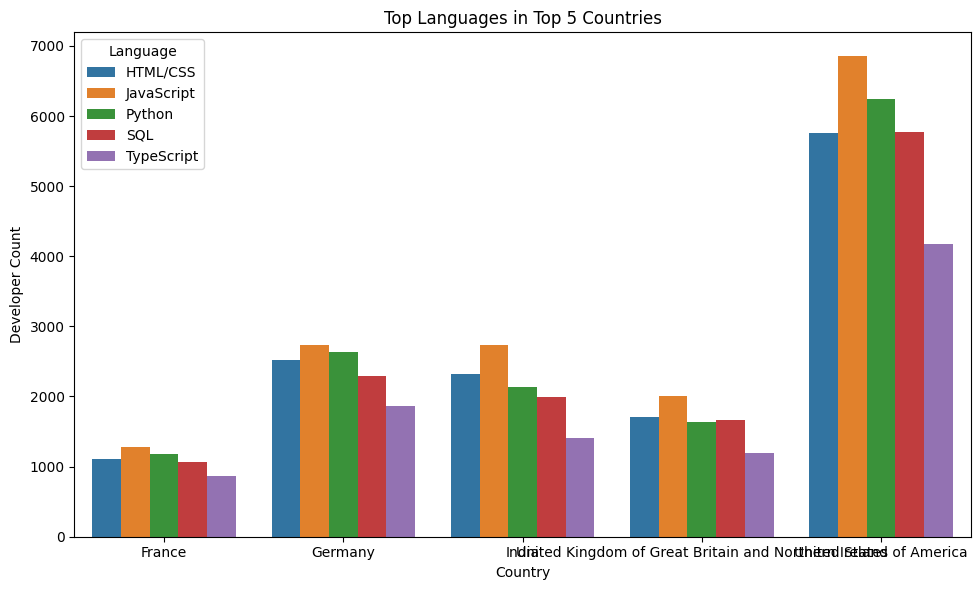

In [27]:
# Expand multi-select column
df_country = df[['Country', 'LanguageHaveWorkedWith']].dropna()
df_country['LanguageHaveWorkedWith'] = df_country['LanguageHaveWorkedWith'].str.split(';')
df_country = df_country.explode('LanguageHaveWorkedWith')

# Count top 5 languages in top 5 countries
top_countries = df_country['Country'].value_counts().head(5).index
top_langs = df_country['LanguageHaveWorkedWith'].value_counts().head(5).index
df_filtered = df_country[df_country['Country'].isin(top_countries) & df_country['LanguageHaveWorkedWith'].isin(top_langs)]

# Count occurrences
lang_country_count = df_filtered.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=lang_country_count, x='Country', y='Count', hue='LanguageHaveWorkedWith')
plt.title('Top Languages in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Developer Count')
plt.legend(title='Language')
plt.tight_layout()
plt.show()


/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_33258/2780165212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lang_next_year.values, y=top_lang_next_year.index, palette='coolwarm')


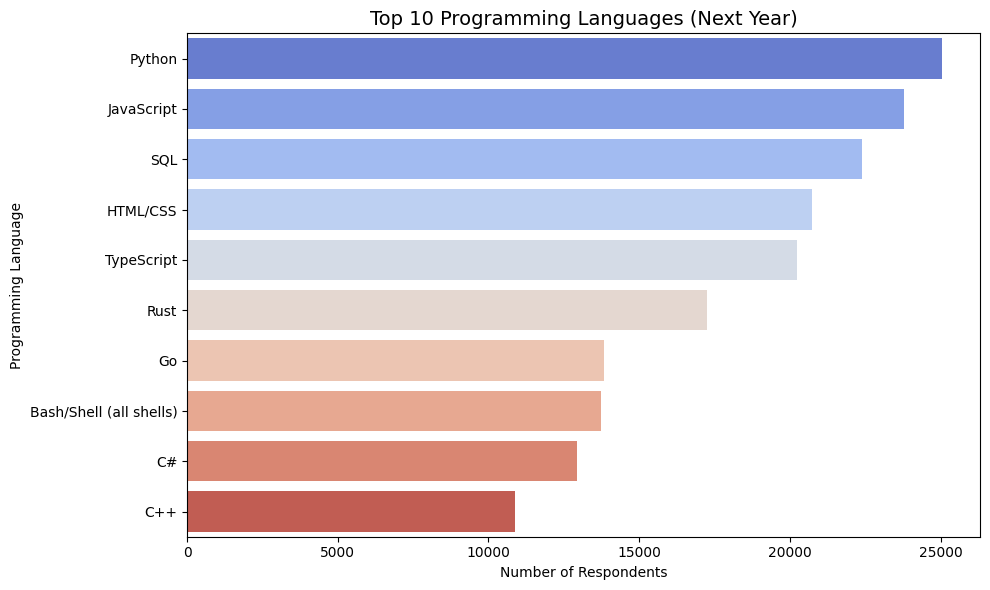

In [9]:
lang_series = df['LanguageWantToWorkWith'].dropna().str.split(';')
lang_flat = pd.Series([lang.strip() for sublist in lang_series for lang in sublist])
top_lang_next_year = lang_flat.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_lang_next_year.values, y=top_lang_next_year.index, palette='coolwarm')
plt.title('Top 10 Programming Languages (Next Year)', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.savefig("ProgrammingNextCurrent.png")
plt.show()

In [15]:
print(df['LanguageHaveWorkedWith'].value_counts())

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                   1004
Python                                                            832
HTML/CSS;JavaScript;PHP;SQL                                       503
C#                                                                453
HTML/CSS;JavaScript                                               452
                                                                 ... 
Bash/Shell (all shells);C;JavaScript;Python;Scala;TypeScript        1
Bash/Shell (all shells);Julia                                       1
Bash/Shell (all shells);Java;JavaScript;Python;Ruby;Scala;SQL       1
Bash/Shell (all shells);Go;Groovy;Haskell;Java;Python               1
C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript                    1
Name: count, Length: 23864, dtype: int64


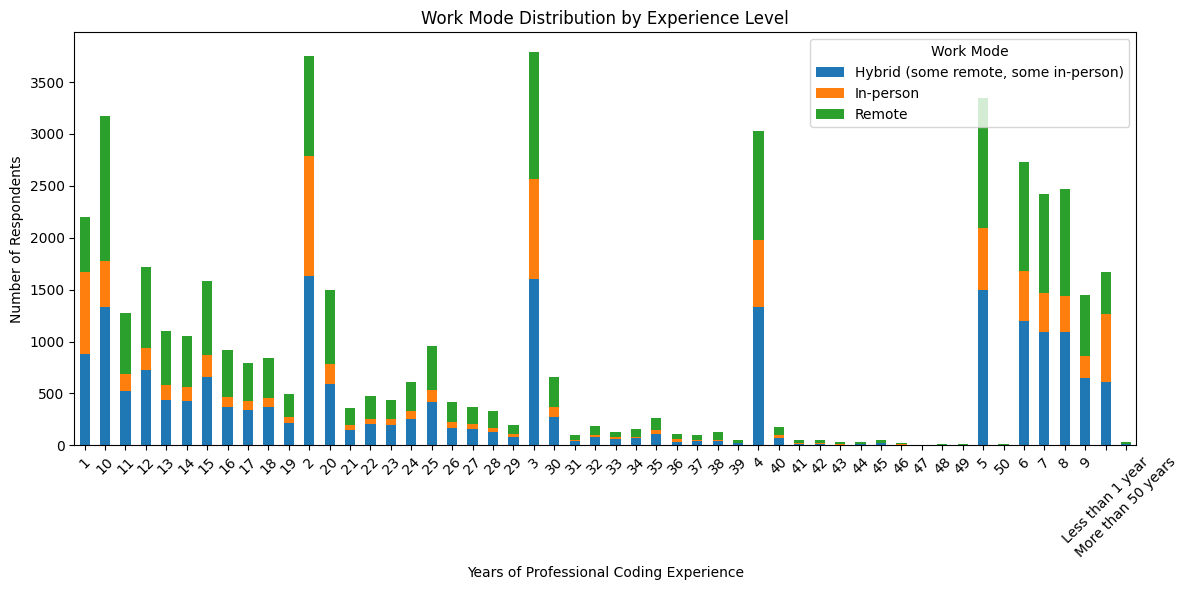

In [35]:
df_exp_mode = df[['YearsCodePro', 'RemoteWork']].dropna()

experience_vs_mode = df_exp_mode.groupby(['YearsCodePro', 'RemoteWork']).size().unstack().fillna(0)

# Plot a stacked bar chart
experience_vs_mode.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Work Mode Distribution by Experience Level")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Work Mode")
plt.tight_layout()
plt.show()

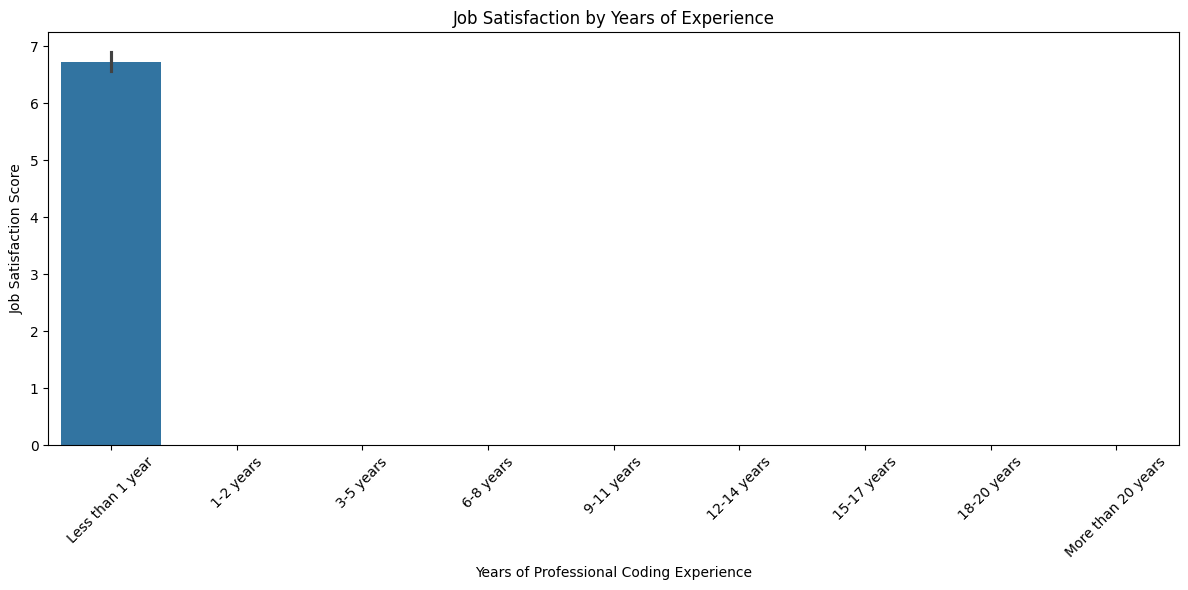

In [37]:
df_exp_sat = df[['YearsCodePro', 'JobSat']].dropna()

ordered_exp = [
    'Less than 1 year', '1-2 years', '3-5 years', '6-8 years',
    '9-11 years', '12-14 years', '15-17 years', '18-20 years', 'More than 20 years'
]
df_exp_sat['YearsCodePro'] = pd.Categorical(df_exp_sat['YearsCodePro'], categories=ordered_exp, ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='YearsCodePro', y='JobSat', data=df_exp_sat)
plt.title("Job Satisfaction by Years of Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()